In [457]:
import numpy as np 
import pandas as  pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly
from scipy import optimize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm
from matplotlib.colors import ListedColormap


In [458]:
df = pd.read_csv('world-happiness-report-2019.csv')
print(df)

             Country (region)  Ladder  SD of Ladder  Positive affect  \
0                     Finland       1             4             41.0   
1                     Denmark       2            13             24.0   
2                      Norway       3             8             16.0   
3                     Iceland       4             9              3.0   
4                 Netherlands       5             1             12.0   
..                        ...     ...           ...              ...   
151                    Rwanda     152            63             54.0   
152                  Tanzania     153           122             78.0   
153               Afghanistan     154            25            152.0   
154  Central African Republic     155           117            132.0   
155               South Sudan     156           140            127.0   

     Negative affect  Social support  Freedom  Corruption  Generosity  \
0               10.0             2.0      5.0         4.0     

In [459]:
#cleaning data by dropping missing values
df.dropna(inplace = True)


In [460]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,79.157143,78.450000,78.242857,79.157143,77.500000,78.828571,75.700000,78.850000,79.014286,75.478571
std,45.700664,46.121255,44.331627,44.506126,45.815787,45.108972,42.656011,44.727782,43.356310,43.979961
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,40.750000,39.750000,40.750000,40.750000,36.750000,39.750000,39.750000,40.750000,41.750000,36.750000
50%,79.500000,77.500000,78.500000,78.500000,77.500000,79.500000,76.500000,79.500000,78.500000,77.500000
75%,119.250000,119.250000,116.250000,117.250000,118.250000,118.250000,112.250000,116.250000,117.250000,113.250000
max,156.000000,156.000000,154.000000,154.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


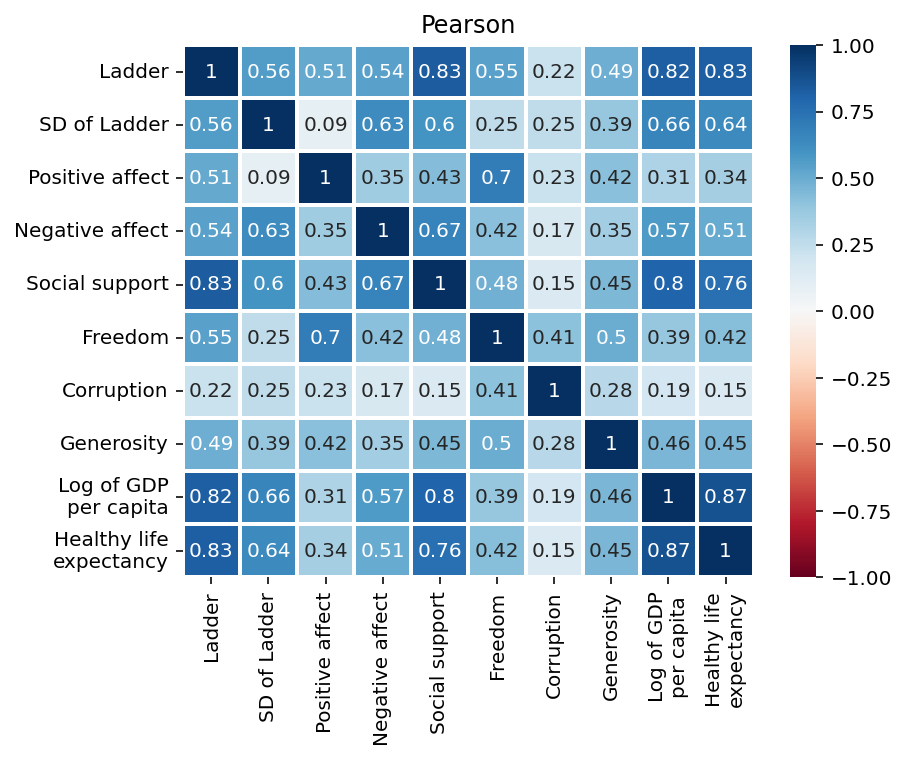

In [461]:
def heatmap ():
    """
    Creating heating map showing Correlation between variable
    """
    plt.figure(dpi = 144)
    sns.heatmap(df.select_dtypes([int,"float"]).corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1,linewidths=2)
    plt.title('Pearson')
    plt.show()
    
heatmap()

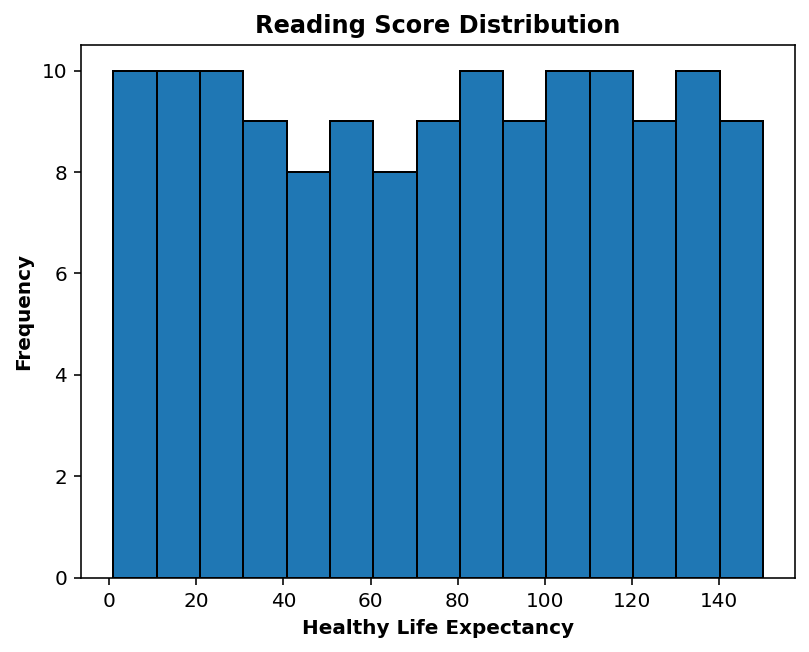

In [462]:
def Distribution_of_reading_score ():
    """
    Plots an Histogram showing the distribution of reading score
    
    Parameter:
    reading score Column from DataFrame
    
    Returns the histogram PLot
    """
    plt.figure(dpi = 144)
    
    plt.hist(x, bins=15, edgecolor='black')
    plt.xlabel('Healthy Life Expectancy' , fontweight = 'bold')
    plt.ylabel('Frequency' , fontweight = 'bold')
    plt.title('Reading Score Distribution' , fontweight = 'bold')
    plt.show()
    

#Retrieving the reading score from the Data set    
x = df['Healthy life\nexpectancy']

Distribution_of_reading_score()

In [463]:
def linefunc(x,a,b):
    y = a*x + b
    return (y)


In [464]:
x = df['Healthy life\nexpectancy']
y = df['Log of GDP\nper capita']

In [465]:
p, cov = curve_fit(linfunc, x, y)  # give it the function to be fitted then x and y

# the errors are the square root of the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(cov))

print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")

a = 0.86 +/- 0.04
b = 14.01 +/- 3.56


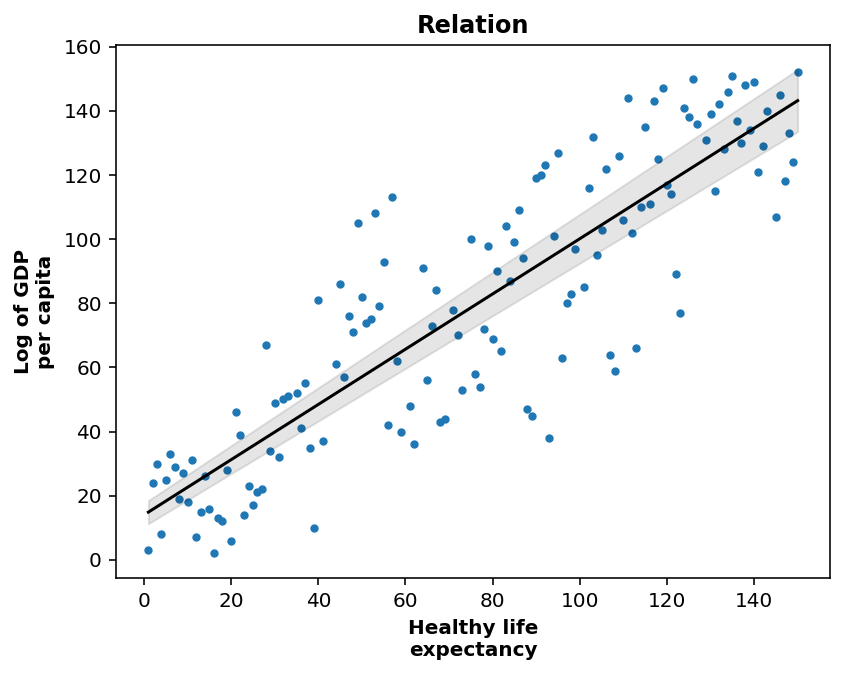

In [466]:
def Relation_btw__gdp_and_healthylife_and_fitted_line():
    """
    Plots an scatter plot showing relation between writing score and math score
    
    Parameter:
    writing score and math score Column from DataFrame
    
    Returns the Scatter PLot
    """
    
    plt.figure(dpi = 144)
    plt.scatter(x,y,s=10, alpha=1)
    xfit = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(xfit,linfunc(xfit, p[0], p[1]), 'k-')
    plt.fill_between(xfit,linfunc(xfit, p[0] - sigma[0], p[1] - sigma[1]),
                     linfunc(xfit, p[0] + sigma[0], p[1] + sigma[1]), color='k', alpha=0.1)
    plt.xlabel('Healthy life\nexpectancy' , fontweight = 'bold')
    plt.ylabel('Log of GDP\nper capita' , fontweight = 'bold')
    
    plt.title('Relation' , fontweight = 'bold')
    
    plt.show()


Relation_btw__gdp_and_healthylife_and_fitted_line()

In [467]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df[['Healthy life\nexpectancy', 'Social support']])


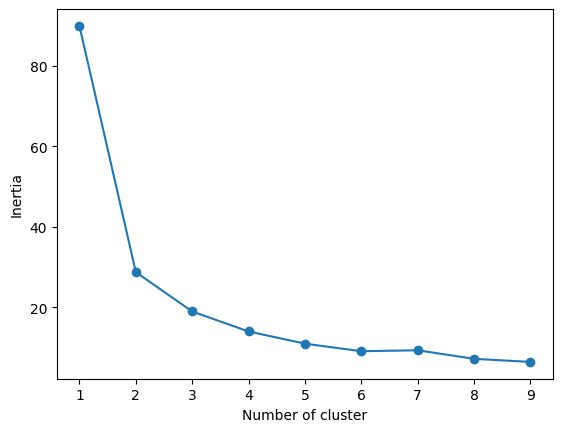

In [468]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    plt.figure()
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of cluster")
    plt.ylabel("Inertia")
    plt.show()
optimize_k_means(df_scaled,10)

In [469]:
kmeans = KMeans (n_clusters=3)
kmeans.fit(df_scaled)
df['kmeans_3']= kmeans.labels_
centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_inverse= scaler.inverse_transform(df_scaled)

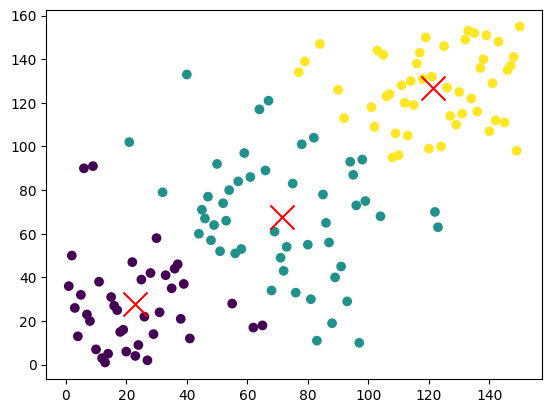

In [473]:
def plot_kmeans_clusters():
    optimal_k = 3

    kmeans = KMeans(n_clusters=optimal_k, n_init=20)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    df_inverse= scaler.inverse_transform(df_scaled)

    colours = ['blue', 'green', 'yellow', 'purple']  # Add more colors if needed
    cmap = ListedColormap(colours)
    plt.scatter(df_inverse[:,0], df_inverse[:,1], c=labels, cmap='viridis', label=labels)
    plt.scatter(centers[:,0],centers[:,1], s= 300, c='red', marker='x', label='centroids')



    plt.show()
plot_kmeans_clusters()